In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('books_cleaned.csv')
df = df.dropna(how='any')
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces

# Display the first few rows of the dataset
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9.780440e+12,eng,652.0,2095690.0,27591.0,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9.780439e+12,eng,870.0,2153167.0,29221.0,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9.780440e+12,eng,352.0,6333.0,244.0,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435.0,2339585.0,36325.0,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9.780440e+12,eng,2690.0,41428.0,164.0,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,eng,512.0,156.0,20.0,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9.780140e+12,eng,635.0,783.0,56.0,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9.780140e+12,eng,415.0,820.0,95.0,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9.780061e+12,eng,434.0,769.0,139.0,2/27/2007,Ecco


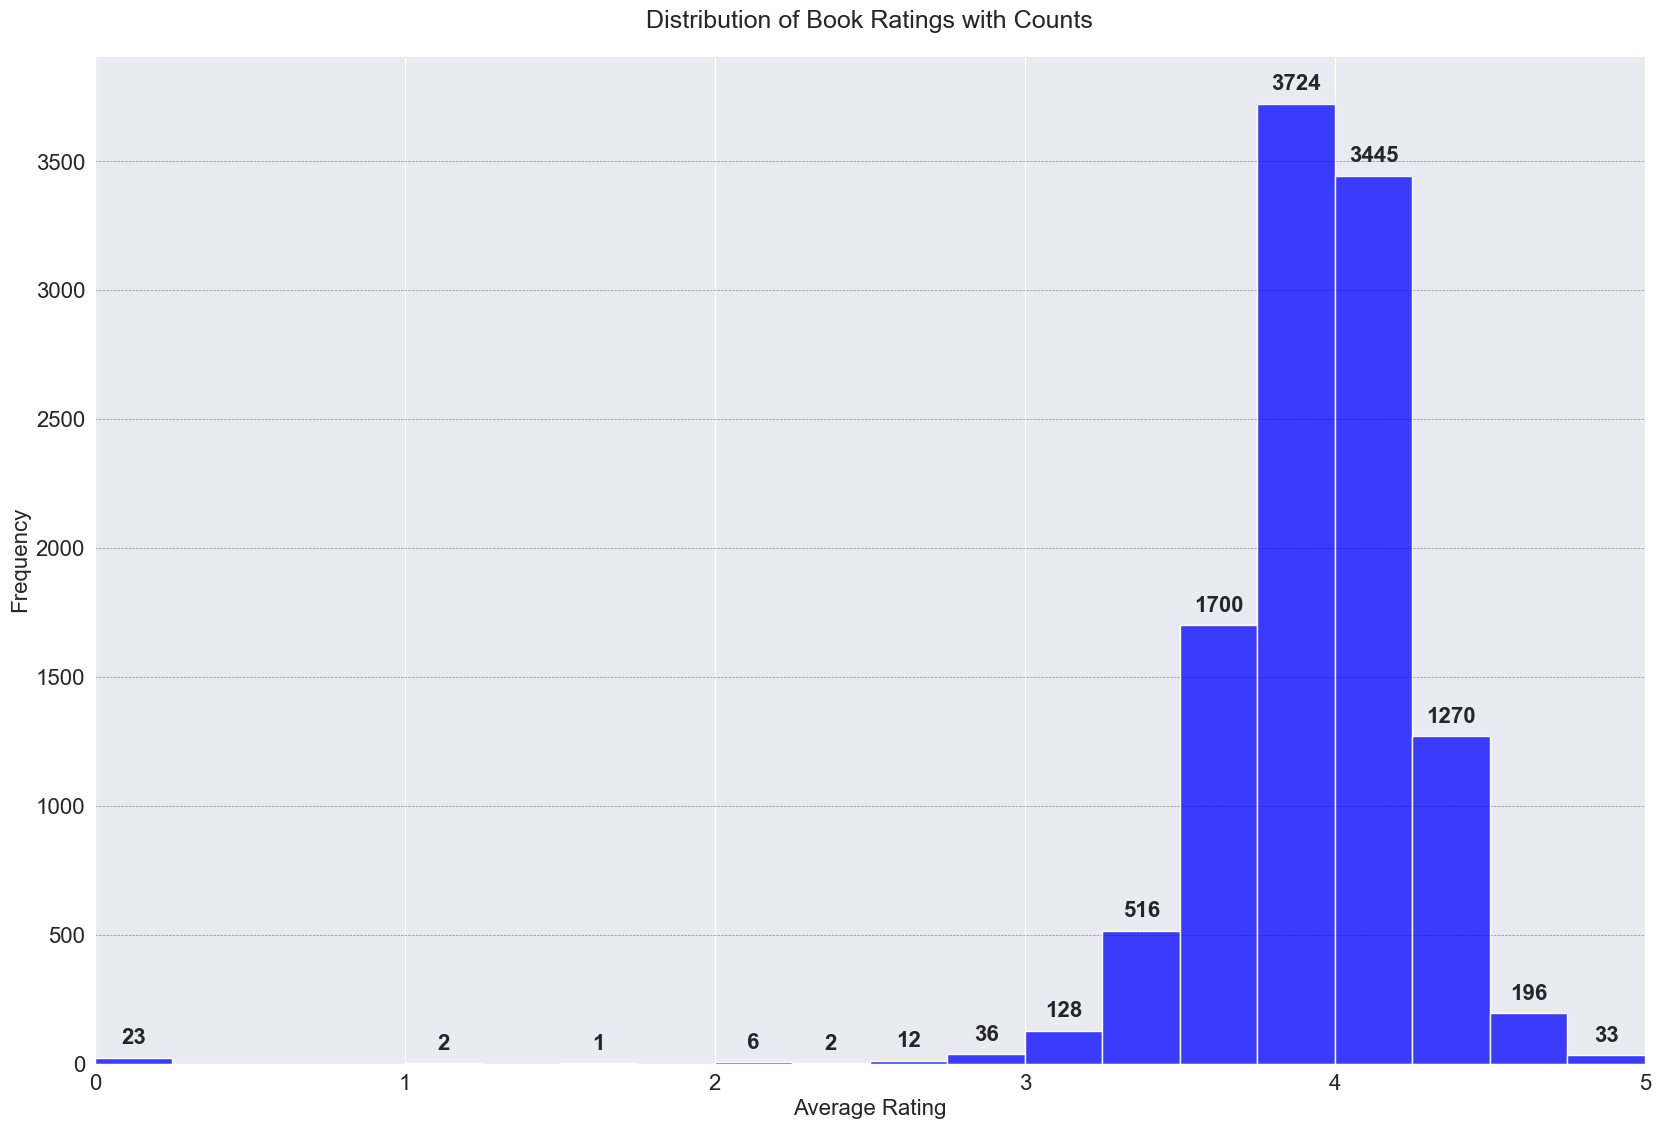

In [36]:
plt.figure(figsize=(20, 12))
ax = sns.histplot(df['average_rating'], bins=20, color='blue')

# Add numeric values on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only label bars with values
        ax.text(x=p.get_x() + p.get_width()/2,  # x-position: center of bar
                y=height + 0.01*max([p.get_height() for p in ax.patches]),  # y-position: slightly above bar
                s=f'{int(height)}',  # text value
                ha='center',  # horizontal alignment
                va='bottom',  # vertical alignment
                fontsize=16,
                fontweight='bold')

# Style the plot
plt.xlabel('Average Rating', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim([0, 5])

# Enhanced grid settings (more visible)
plt.grid(axis='y',
         linestyle='--',
         linewidth=0.5,  # Thicker grid lines
         alpha=0.9,      # Less transparency (more opaque)
         color='gray')   # Darker color

# Adjust top margin to make room for value labels
plt.subplots_adjust(top=0.95)

plt.title('Distribution of Book Ratings with Counts', fontsize=18, pad=20)
plt.show()

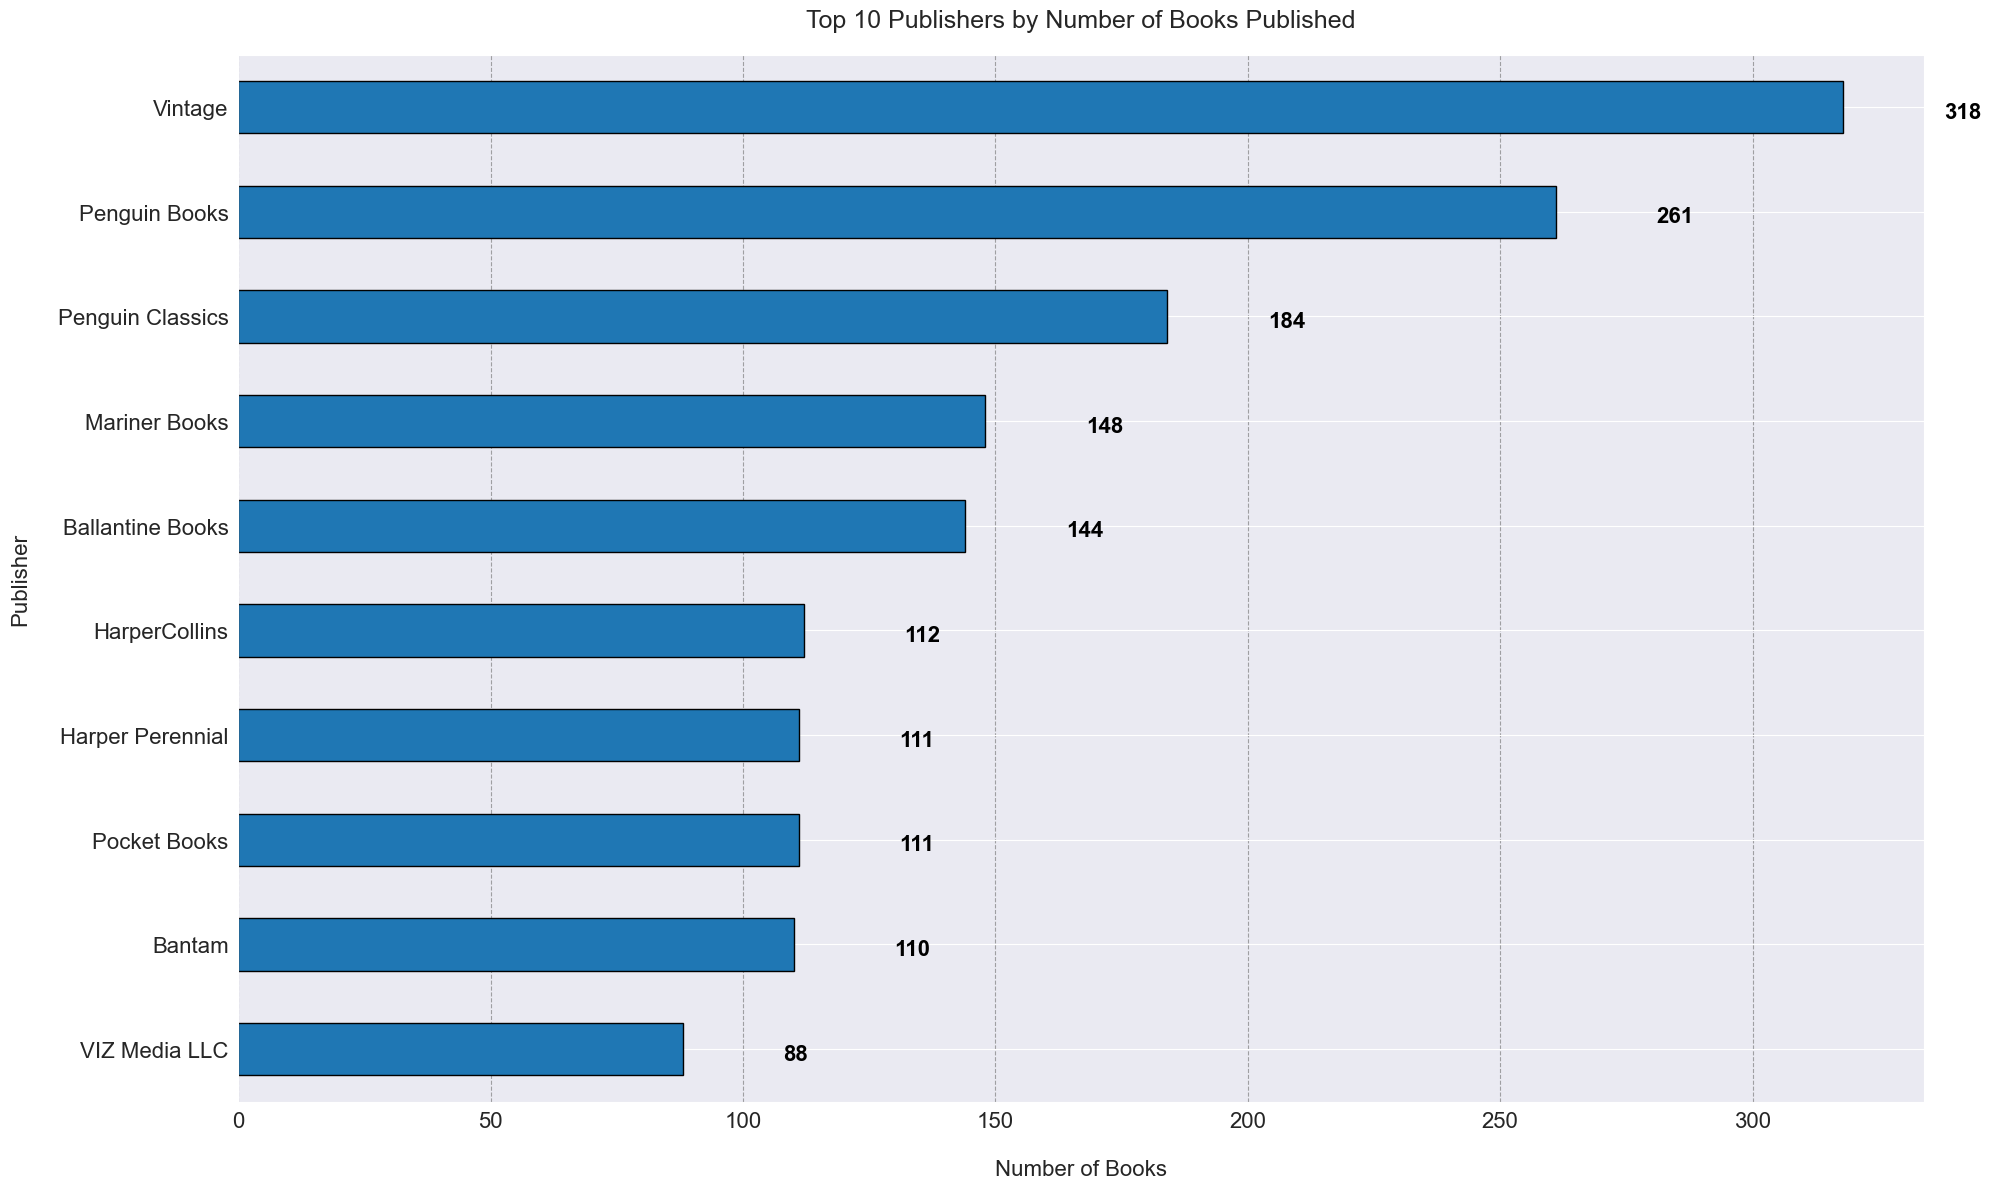

In [37]:
plt.figure(figsize=(20, 12))
top_publishers = df['publisher'].value_counts().nlargest(10).sort_values()
ax = top_publishers.plot(kind='barh', color='#1f77b4', edgecolor='black')

# Value labels
for i, v in enumerate(top_publishers):
    ax.text(v + 20, i - 0.1, str(v),
            color='black', fontsize=16, fontweight='bold')

# Styling
plt.xlabel('Number of Books', fontsize=16, labelpad=20)
plt.ylabel('Publisher', fontsize=16, labelpad=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7, color='gray')
plt.title('Top 10 Publishers by Number of Books Published', fontsize=18, pad=20)
plt.tight_layout()
plt.show()

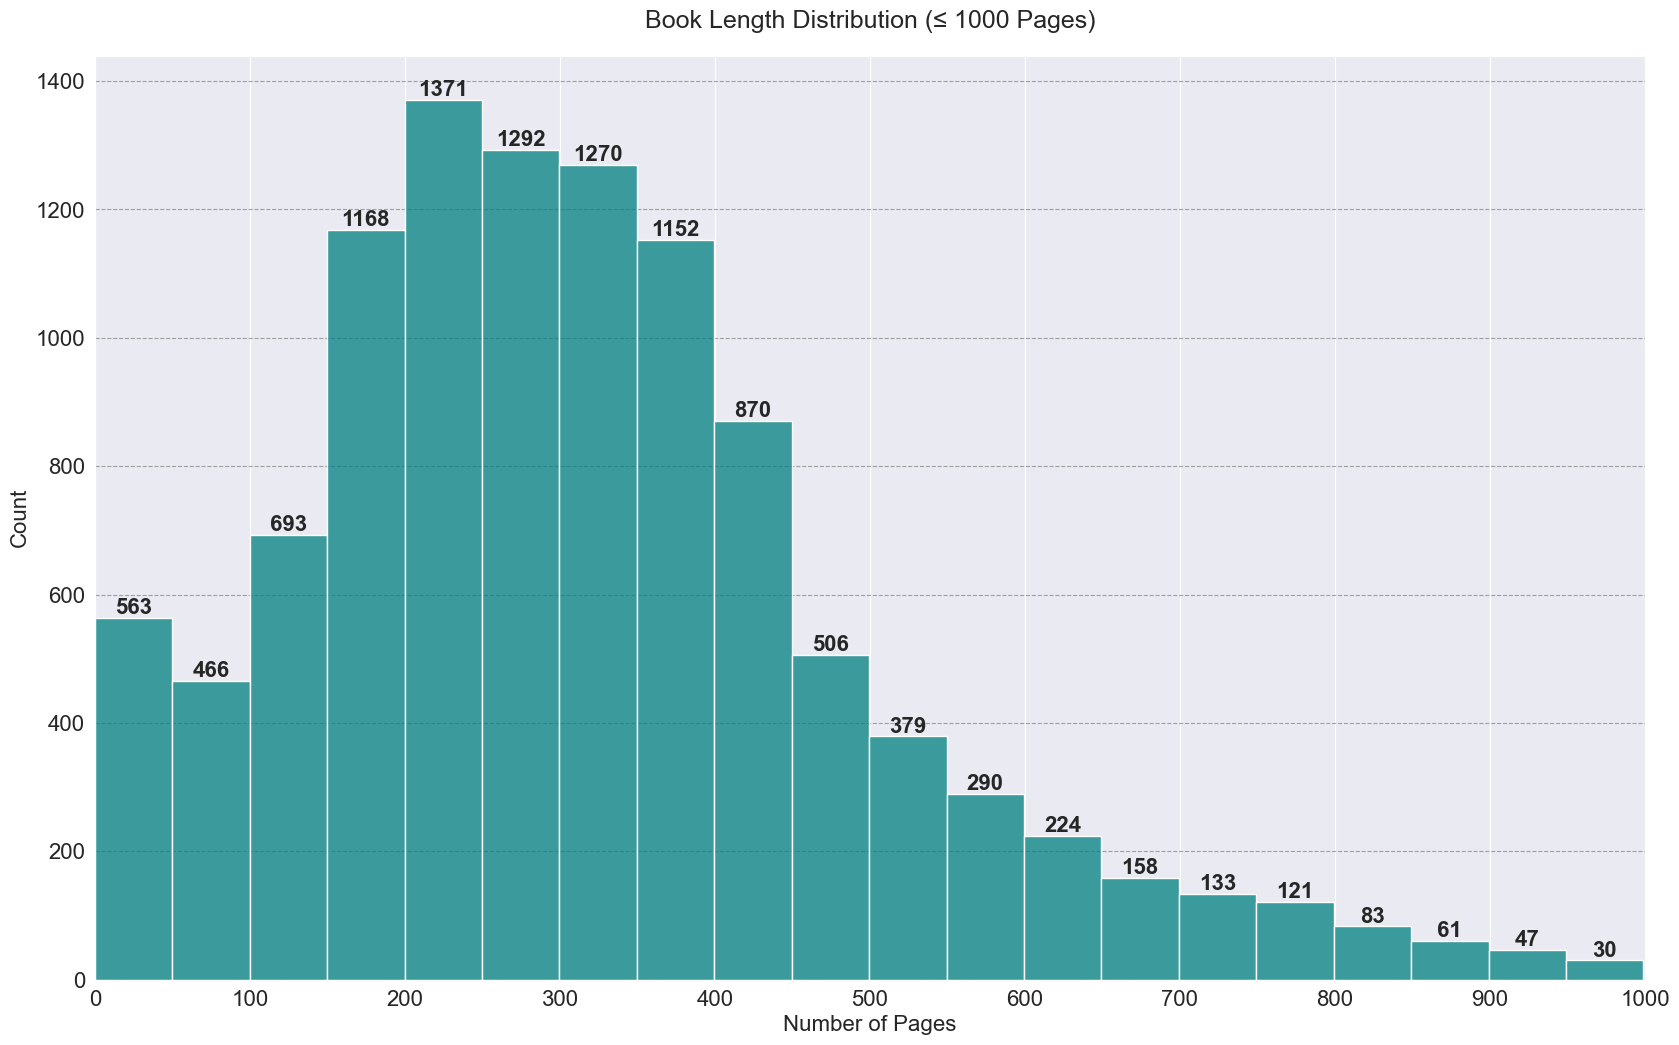

In [38]:
plt.figure(figsize=(20, 12))

# Filter data to only include books with <= 1000 pages
filtered_df = df[df['num_pages'] <= 1000]

# Create bins every 50 units (1000/20=50)
ax = sns.histplot(filtered_df['num_pages'], bins=20, color='teal')

# Bar labels
for p in ax.patches:
    if p.get_height() > 0:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(),
                f'{int(p.get_height())}',
                ha='center', va='bottom', fontsize=16, fontweight='bold')

# Styling - set x-axis ticks every 100 units
plt.xticks(np.arange(0, 1001, 100), fontsize=16)  # Labels every 100 units
plt.xlabel('Number of Pages', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim([0, 1000])  # Ensures x-axis stops at 1000
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
plt.title('Book Length Distribution (≤ 1000 Pages)', fontsize=18, pad=20)

plt.show()

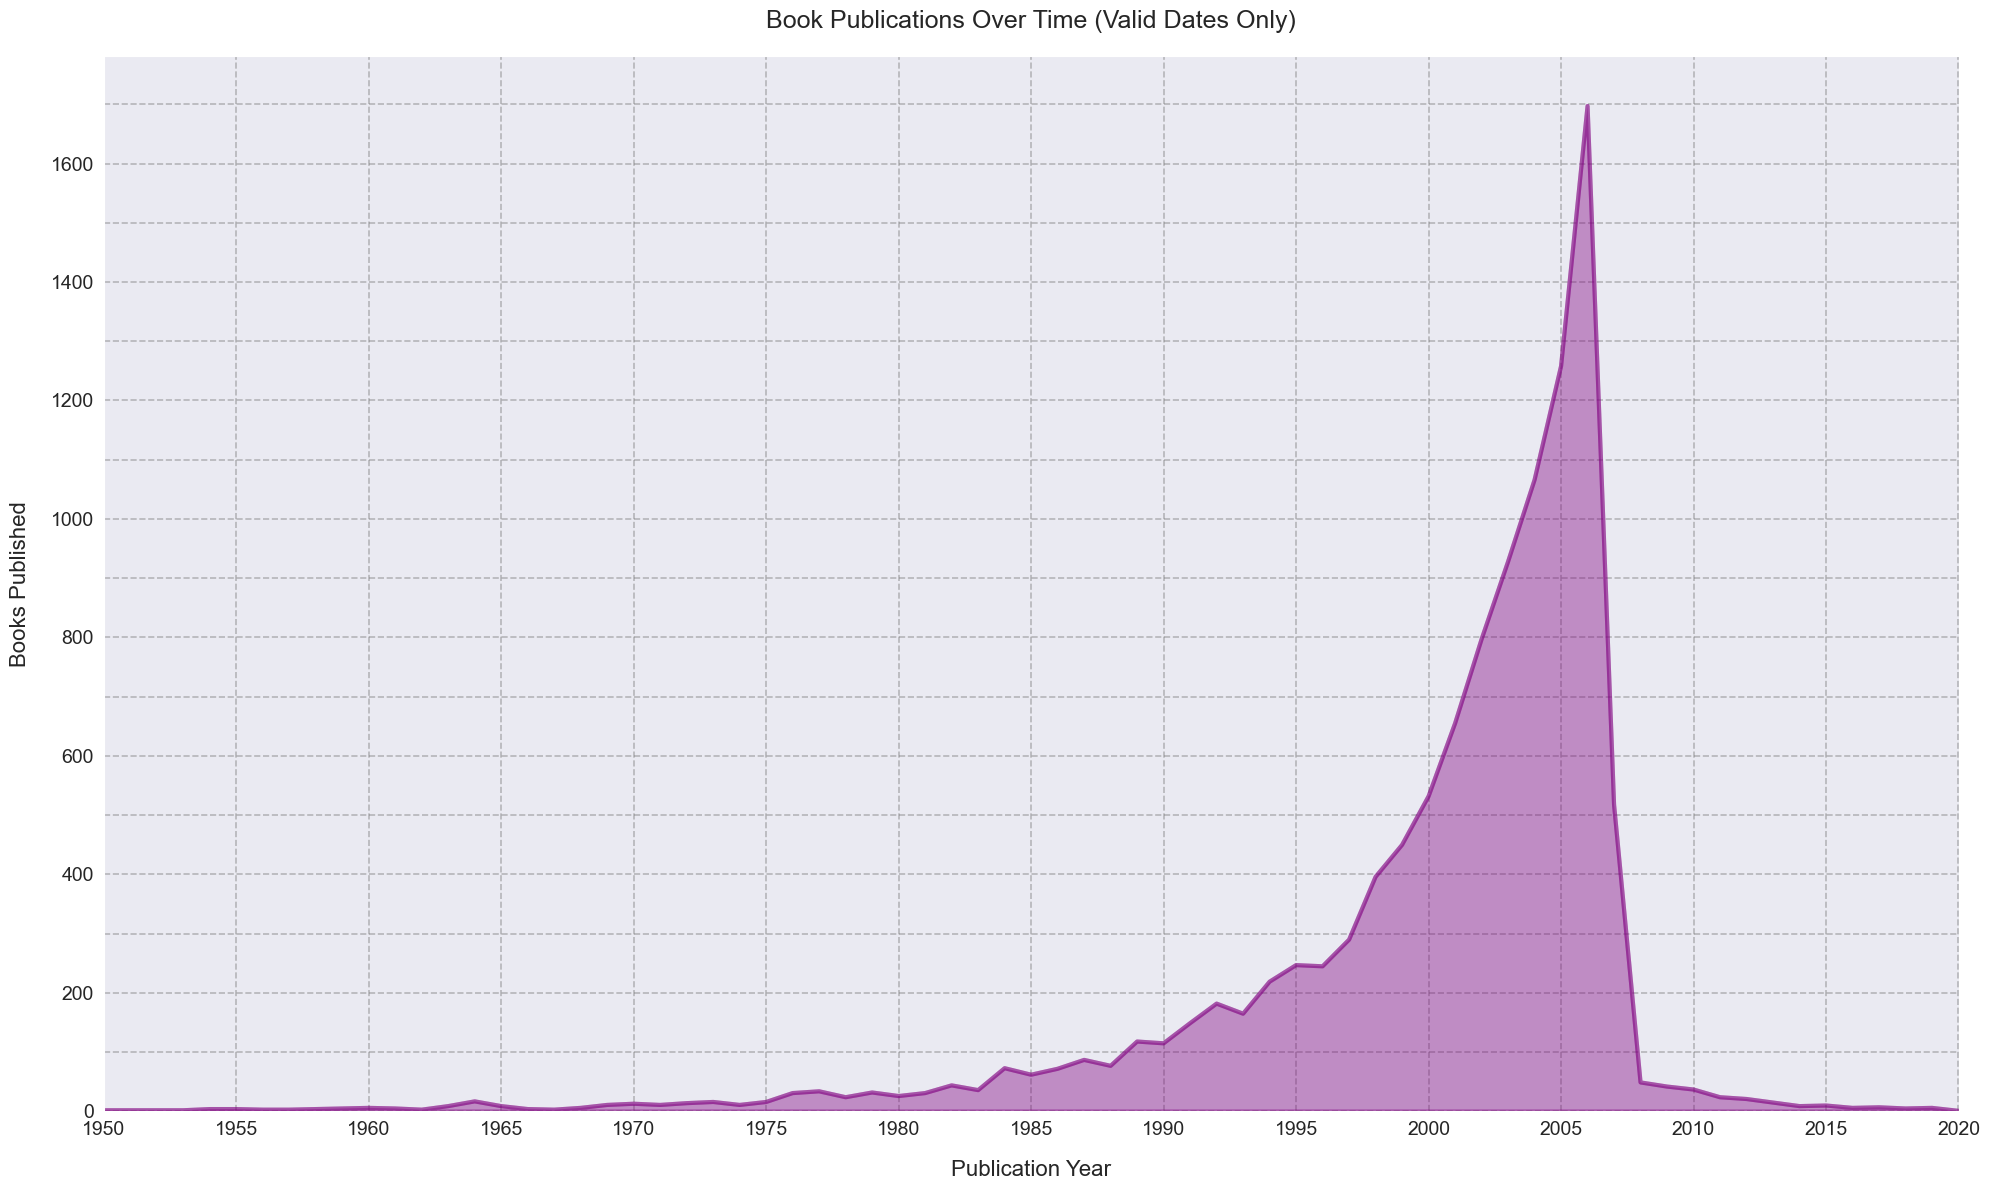

In [39]:
import matplotlib.ticker as ticker

plt.figure(figsize=(20, 12))

# Convert to datetime with error handling
df['year'] = pd.to_datetime(
    df['publication_date'],
    errors='coerce',
    format='mixed'
).dt.year

# Drop rows with invalid dates
df_clean = df.dropna(subset=['year'])

# Filter and count years (1900-2020)
year_counts = df_clean['year'].value_counts().sort_index().loc[1900:2020]

# Create plot
ax = year_counts.plot(kind='area', color='purple', alpha=0.4, linewidth=3)

# Enhanced grid - both x and y, more visible
plt.grid(which='both', linestyle='--', alpha=0.5, linewidth=1.2, color='gray')

# X-axis ticks every 10 years
plt.xticks(np.arange(1900, 2021, 5), fontsize=14)
plt.yticks(fontsize=14)

# Minor ticks for denser grid (optional)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))  # Every 5 years
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))  # Auto minor ticks for y

# Labels and title
plt.xlabel('Publication Year', fontsize=16, labelpad=15)
plt.ylabel('Books Published', fontsize=16, labelpad=15)
plt.title('Book Publications Over Time (Valid Dates Only)', fontsize=18, pad=20)
plt.xlim(1950, 2020)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()